In [1]:
from random import sample
import numpy as np
import librosa
from datetime import datetime
import math
import matplotlib.pyplot as plt
from IPython.display import HTML, Audio
import librosa.display as ld
import seaborn as sns
sns.set()

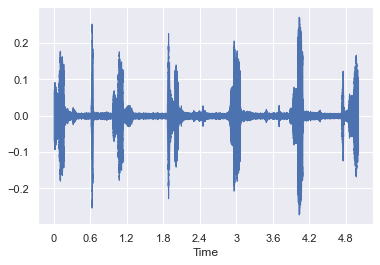

In [3]:
filename = './base_2.wav'
data, sample_rate = librosa.load(filename,sr=None)

ld.waveshow(y= data, sr=sample_rate)
Audio(data=data, rate = sample_rate)

In [4]:
data.shape, sample_rate

((220500,), 44100)

(1025, 431)


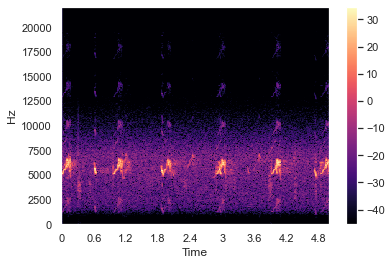

In [5]:
hop_lenght = 512 #comprimento do salto
n_ftt = 2048 #tamanho do quadro
x = librosa.stft(data, n_fft=n_ftt, hop_length=hop_lenght)
print(x.shape)
s = librosa.amplitude_to_db(abs(x))
ld.specshow(s,sr=sample_rate, hop_length=hop_lenght, x_axis='time', y_axis='linear')
plt.colorbar()

In [7]:
x.shape

(1025, 431)

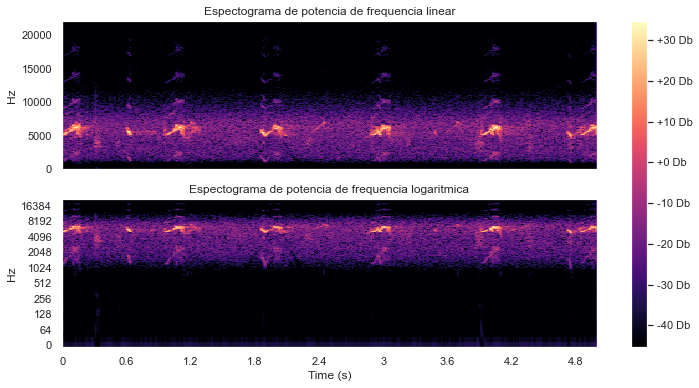

In [17]:
#logaritima
d = librosa.stft(data)
D = librosa.amplitude_to_db(abs(d))
fig, ax = plt.subplots(2,1,figsize= (12, 6))
ax[0].set(title="Espectograma de potencia de frequencia linear")
img = ld.specshow(D, y_axis='linear', x_axis= 's', sr=sample_rate, ax=ax[0])
ax[1].set(title="Espectograma de potencia de frequencia logaritmica")
ld.specshow(D, y_axis='log', x_axis='s', sr=sample_rate, ax=ax[1])
ax[0].label_outer()
fig.colorbar(img, ax = ax, format = '%+2.0f Db')
ax[1].label_outer()


C:\Users\david\AppData\Local\Temp\ipykernel_3372\3074009065.py:2: FutureWarning: Pass y=[-0.04711914 -0.03512573 -0.00531006 ...  0.03390503 -0.04568481
 -0.09875488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(data, sr=sample_rate, n_mels=128)


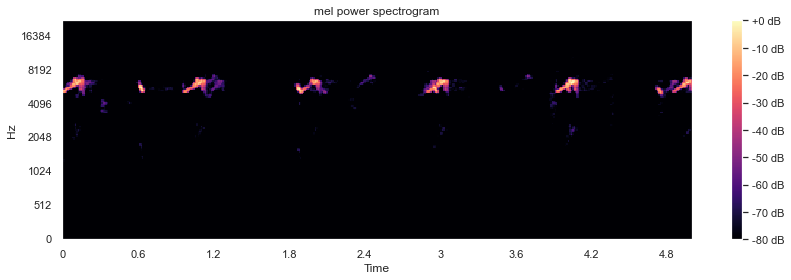

In [26]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(data, sr=sample_rate, n_mels=128)

# Conversao para log scale (dB).
log_S = librosa.amplitude_to_db(np.abs(S),ref=np.max)

plt.figure(figsize=(12,4))

# Display espectograma em escala mel
# sample rate e hop length parameters usados para renderizar o eixo do tempo
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

In [27]:
log_S.shape

(128, 431)

C:\Users\david\AppData\Local\Temp\ipykernel_3372\164380817.py:1: FutureWarning: Pass y=[-0.04711914 -0.03512573 -0.00531006 ...  0.03390503 -0.04568481
 -0.09875488], sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sample_rate)


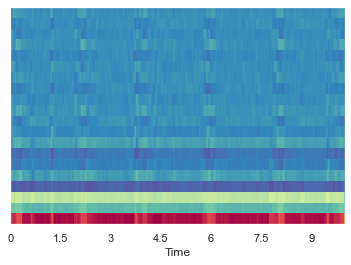

In [29]:
mfccs = librosa.feature.mfcc(data, sample_rate)
ld.specshow(mfccs, x_axis='time',cmap='Spectral')

(110250,)


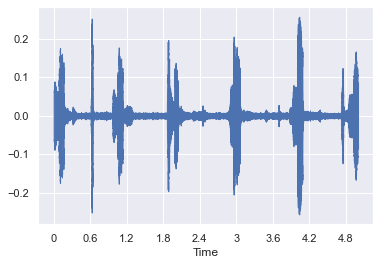

In [104]:
#Freq 22050
filename = "./base_2.wav"
y, sample_rate = librosa.load(filename,)

print(y.shape)
ld.waveshow(y= y, sr=sample_rate)
Audio(data=y, rate = sample_rate)


In [41]:
melbands = []
win_length = 1024
hopSize = 1024
#mfccs = librosa.feature.mfcc(y, sample_rate, n_mfcc=128,hop_length=hopSize, win_length=frameSize)
mfccs = librosa.feature.mfcc(y, sample_rate, n_mfcc=60,n_mels=128,hop_length=hopSize, win_length=frameSize)


C:\Users\david\AppData\Local\Temp\ipykernel_3372\3360475612.py:5: FutureWarning: Pass y=[-0.03429237 -0.00999502  0.05024242 ...  0.0178437   0.08489684
 -0.04794232], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sample_rate, n_mfcc=60,n_mels=128,hop_length=hopSize, win_length=frameSize)


In [43]:
mfccs.shape

(60, 108)

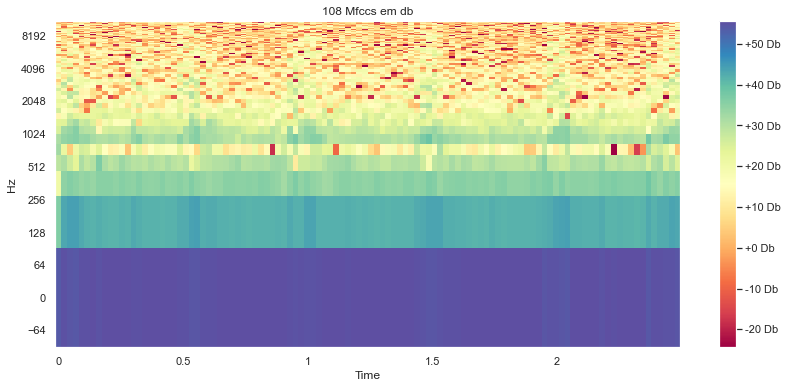

In [37]:
import matplotlib.pyplot as plt 
#para decibeis
fig = plt.figure(figsize=(14,6))
mfccs_db = librosa.amplitude_to_db(abs(mfccs))
#espectograma
img = ld.specshow(mfccs_db, sr=sample_rate, x_axis='time', y_axis='log', cmap='Spectral')
plt.title("108 Mfccs em db")
plt.colorbar(img, format = '%+2.0f Db')

In [99]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += (window_size / 2)

In [108]:
bands=60
frames=41
window_size = 512 * (frames - 1)
log_specgrams = []
for(start, end) in windows(y, window_size):
    if len(y[start:end]) == window_size:
        signal = y[start:end]
        melspec = librosa.feature.melspectrogram(signal, n_mels=bands)
        logspec = librosa.power_to_db(melspec, ref=np.max)
        logspec = logspec.T.flatten()[:, np.newaxis].T
log_specgrams.append(logspec)

log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams), bands, frames, 1)
features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis=3)
for i in range(len(features)):
    features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
 


C:\Users\david\AppData\Local\Temp\ipykernel_3372\657780028.py:8: FutureWarning: Pass y=[-0.03429237 -0.00999502  0.05024242 ...  0.00364027 -0.00058746
 -0.00313774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(signal, n_mels=bands)
C:\Users\david\AppData\Local\Temp\ipykernel_3372\657780028.py:8: FutureWarning: Pass y=[-1.8543649e-03 -2.6037758e-03 -4.9710852e-05 ...  7.7157171e-04
  1.1126556e-03 -2.5719490e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(signal, n_mels=bands)
C:\Users\david\AppData\Local\Temp\ipykernel_3372\657780028.py:8: FutureWarning: Pass y=[-0.00096436  0.00014154 -0.00012696 ...  0.00109033  0.00356098
 -0.00256333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(signal, n_mels=bands

In [109]:
features.shape

(1, 60, 41, 2)